# AdaBoost in sklearn

@masahiro rikiso, 170306

* http://scikit-learn.org/stable/modules/ensemble.html

---

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

## load dataset

In [3]:
from sklearn import datasets
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

In [5]:
RF = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=8)
RF.fit(X_train,y_train)

AB = AdaBoostClassifier(n_estimators=400, learning_rate=1.)
AB.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=400, random_state=None)

In [6]:
from sklearn.metrics import zero_one_loss

ada_real_err = np.zeros((400,))
for i, y_pred in enumerate(AB.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((400,))
for i, y_pred in enumerate(AB.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

In [12]:
rf_error_train = 1.0 - RF.score(X_train, y_train)
rf_error_test = 1.0 - RF.score(X_test, y_test)

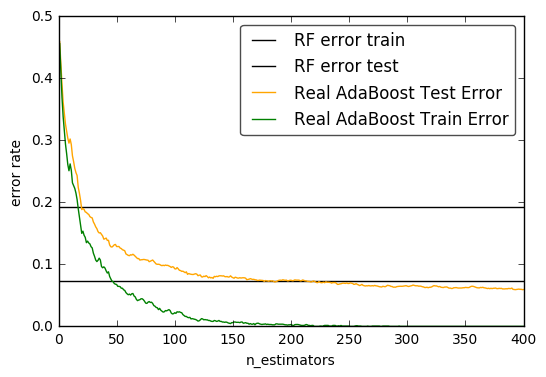

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, 400], [rf_erorr_train] * 2, 'k-',
        label='RF error train')
ax.plot([1, 400], [rf_erorr_test] * 2, 'k-',
        label='RF error test')

ax.plot(np.arange(400) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(400) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

## visualization of importance

Feature ranking:
1. feature 1 (0.136867)
2. feature 6 (0.130152)
3. feature 2 (0.124615)
4. feature 5 (0.120810)
5. feature 0 (0.101040)
6. feature 9 (0.089535)
7. feature 8 (0.084148)
8. feature 4 (0.080010)
9. feature 3 (0.079882)
10. feature 7 (0.052940)


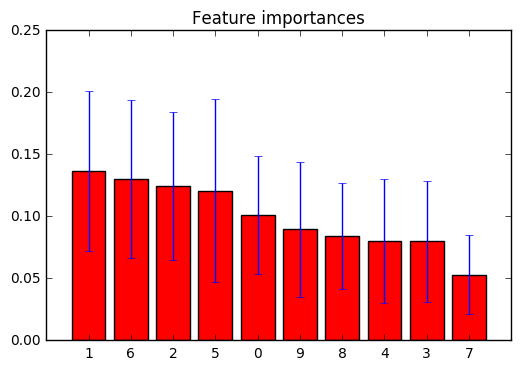

In [16]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()